<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Specialist Diploma in Data Analytics</h3></th>
    </tr>
</table>

In [ ]:
# Grade: A

# generally good execution of concepts and code taught in class

# slight concerns about using post-race results such as number of laps to predict a post-race feature milliseconds
# need to consider real life situation where not all data is available to us at point of prediction,
# and we typically predict post-event variable from pre-event data


### Table of Contents
1. Introduction
2. Load and Explore Data
3. Data Wrangling on Multiple Tables (with a little data cleaning)
4. Further Data Cleansing and Transformation 
    <br>4.1 X train split</br>
    <br>4.2 Categorical Encoding</br>
    <br>4.3 Numerical Transformation</br>
    <br>4.4 Feature Scaling</br>
5. Machine Learning Model (Multiple Linear Regression)
6. Possible Further Improvements and Conclusion

### 1. Introduction
Formula One racing is a historical sport that has been going on for decades, and one topic of interest among is the audience is usually who will be winning the race, especially the favourites such as Lewis Hamilton. I will be building a multiple linear regression model to predict the outcomes of formula one races.This will be based on the past results, driver and constructor standings, different circuits , past results for each country etc.

Firstly, I will explore the dataset to see which variables that I can possibly include, based on my general knowledge about F1 and whether the data is sufficient ( preferably low number of missing values) to include into my analysis. Then I will identify the target variable, which will be related to the results of the race (i.e. time to finish the race, ranking position). The ML model built will then be able to predict the outcomes of future races, which will be very useful information for many parties with a vested interest in the outcome of the race.




In [1]:
# import the packages
import pandas as pd
import numpy as np

### 2.Load and Explore the Data

In [2]:
df = pd.read_csv('races_mod.csv')
df.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


For the first tanle I am exploring, it contains race information. Out of this information I am interested in the Year information. However I may have to do some data cleaning as there seem to be some erroneous data entry in terms of year.
the common columns seem to be the first three columns, and the columns of interest for my model are the date (year) and name of the race, as these 2 variables combined would refer to a specific Grand Prix. I will extract the year from date and the name variable in my data analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   round      1080 non-null   int64 
 2   circuitId  1080 non-null   int64 
 3   name       1080 non-null   object
 4   date       1070 non-null   object
 5   time       1080 non-null   object
 6   url        1080 non-null   object
dtypes: int64(3), object(4)
memory usage: 59.2+ KB


In [4]:
driver = pd.read_csv('drivers_mod.csv')
driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


We can see from the data that only driverRef has unique values, and driverId is the link to the results_mod csv.
The connecting columns to the other result_mod table would be the driverId. For this, I am potentially interested in driverRef as it is a unique id for each driver with no duplicates and data seems to be complete. ( double checked this in excel as well by using the check duplicates function)

In [5]:
driver.isnull().sum()
#data seems complete

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

In [ ]:
#JC do not over rely on code to auto extract null values, "\N" while not recognised as a NaN, is actually a placeholder
# for null/missing values in this dataset.
# good that you noticed and fixed this later in data transformtion, no penalty

In [6]:
res = pd.read_csv('results_mod.csv')
res.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


the results mod csv appears to have the most information on results.
I will also delete duplicate columns such as position/positionText/PositionOrder as they are referring to the same thing.
Milliseconds and position could be potential target variables as we are attempting to predict the outcome of the race.
Grid position and laps is also correlated with the amount of time needed to finish the race, hence these are likely variables than can be included into the linear regression model.

result/race/driverId seems to be the common column with the other csv files that we have explored, and can be used as a common link when merging files.

Some columns that are not important can be dropped i.e. number(random number assigned to driver with possible duplicates), time (due to the format it might be more challenging to transform,statusId ( does not seem to have much of an impact on results). 

Looking at the histogram of the variables below, it seems like they do not generally follow a standard normal distribution, and would require some transformation of variables to assume a more normal distribution. 

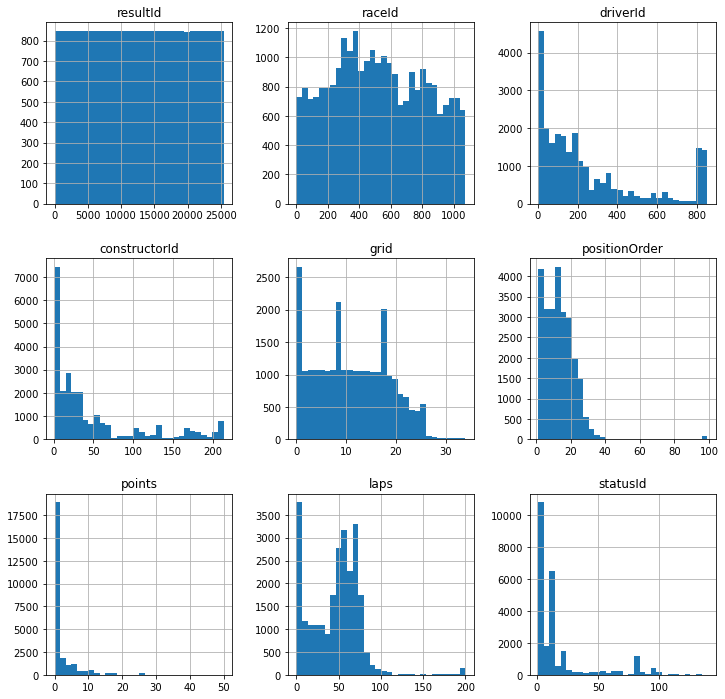

In [7]:
import matplotlib.pyplot as plt
res.hist(bins=30, figsize=(12,12))
plt.show()

<b> Outlier Trimming? </b> : For my columns of interest in this results table (laps and grid) There seems to be a small amount of outlier variables.However upon examination of the data in excel file, I do not believe these outliers are due to incorrect data. For example, for the outlier data in the "laps" variable, based on a google search there are some race tracks that have a large number of laps, and this will correspond to an increase in the lap timings accordingly. Subsequently there will be quite a lot of data dropped due to null values, hence I will not be doing any outlier trimming to preserve the data.

In [ ]:
#JC good that you considered before dropping outliers, as sometimes perceived outliers can be valid and useful still
# note however, some outliers are sometimes the result of typos, which need data cleaning,
# such as year == 12021, which inputation principles might lead to
# a substitution with 2021 upon further investigation.

Next I will explore the constructors mod csv file. It shows constructor information, such as ref. As constructorRef has unique values for all, we will use this as a categorical variable for data analysis. I will slice out a subset of the data so that It won't be so messy/so many rows when i merge it with another column. constructorId will also be kept as it is the common link to the results table.

In [8]:
con = pd.read_csv('constructors_mod.csv')
con.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [9]:
con.isnull().sum()

constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64

In [10]:
# we can drop the name aas we only need the ref.
con = con[['constructorId','constructorRef']]
con

,constructorId,constructorRef
0,1,mclaren
1,2,bmw_sauber
2,3,williams
3,4,renault
4,5,toro_rosso
...,...,...
206,209,manor
207,210,haas
208,211,racing_point
209,213,alphatauri


Some factors I have identified to be potentially important to find the race times of the driver: Grid pposition, constructor, driver, laps, name of race (as a proxy for the country the race is held in), year.

The number of laps would also affect the milliseconds required to finish the race, as a higher number of laps result in a longer time. Hence laps will be included in the dataset below.

The grid position is closely related to the qualifying position as according to Wikipedia -"Grid position is typically determined by a qualifying session before the race, where race participants compete to ascend to the number 1 grid slot, the driver, pilot, or rider having recorded fastest qualification time awarded the advantage of the number 1 grid slot (i.e., the pole-position)". Being put in a more advantageous grid position gives the driver a bigger advantage of winning the race, hence it will be included in our data analysis.

The year the race is held at is important. As technology improves, we can expect cars to get faster over time. Hence the cars in 2022 would be expected to travel faster than those.

The country the race is held in is important. It can give local drivers a potential advantage, not to mention a different circuit and terrain/weather that foreign drivers might not be used to. 

In our next step, I will be creating new columns with the required values ( ie. extracting YEAR from the date of race in the dataframe).I will be combining some of the tables that I feel have relevant information ( results, race information, driver information and constructor information) to predicting the outcome of the race. After that I will be dropping all the irrelevant columns and keeping those which I feel are relevant.

3. Data Wrangling on multiple tables 

Firstly, I would like to merge the tables. But upon exploration of the dataframe for race information, we have to extract out the year from the date, which is the last four characters in date. I can't format the date as a datetime format due to the incorrect entries (i.e. year 12009 referring to year 2009), hence I use this method to manually extract as many dates as I can. However as we can see below there are quite a few blanks which I will fill in later steps.

In [11]:
df['year'] = df['date'].str[-4:]
df["year"] = pd.to_datetime(df["year"]).dt.strftime('%Y')
# to extract out the year, i extracted the last 4 digits. I am only planning to do analysis on the year.
df.sort_values(by='year')

,raceId,round,circuitId,name,date,time,url,year
838,839,7,14,Italian Grand Prix,9/3/1950,\N,http://en.wikipedia.org/wiki/1950_Italian_Gran...,1950
837,838,6,55,French Grand Prix,7/2/1950,\N,http://en.wikipedia.org/wiki/1950_French_Grand...,1950
836,837,5,13,Belgian Grand Prix,6/18/1950,\N,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,1950
835,836,4,66,Swiss Grand Prix,6/4/1950,\N,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,1950
834,835,3,19,Indianapolis 500,5/30/1950,\N,http://en.wikipedia.org/wiki/1950_Indianapolis...,1950
...,...,...,...,...,...,...,...,...
935,948,1,1,Australian Grand Prix,NaN,5:00:00,https://en.wikipedia.org/wiki/2016_Australian_...,NaN
948,961,14,14,Italian Grand Prix,NaN,12:00:00,https://en.wikipedia.org/wiki/2016_Italian_Gra...,NaN
978,991,3,17,Chinese Grand Prix,NaN,6:10:00,https://en.wikipedia.org/wiki/2018_Chinese_Gra...,NaN
1015,1028,19,69,United States Grand Prix,NaN,19:10:00,https://en.wikipedia.org/wiki/2019_United_Stat...,NaN


In [12]:
# find out null values in year col.
df.isnull().sum()
# as only 10 rows, we can drop the columns or fill in the data .

raceId        0
round         0
circuitId     0
name          0
date         10
time          0
url           0
year         10
dtype: int64

From the above output, we can see that there are blanks in both time and year. Therefore we will filter out the rows with blank values to see how we can fill the information. As seen below, we can fill the 10 missing values based on the information in the url. As it is only a handful of values, I will be able to fill it in one by one for this dataset based on the information that I can see in the url.

In [13]:
df[df.isnull().any(axis=1)]
#filtering out rows with blank values.

,raceId,round,circuitId,name,date,time,url,year
26,27,10,10,German Grand Prix,NaN,12:00:00,http://en.wikipedia.org/wiki/2008_German_Grand...,NaN
68,69,17,22,Japanese Grand Prix,NaN,14:00:00,http://en.wikipedia.org/wiki/2006_Japanese_Gra...,NaN
104,105,16,17,Chinese Grand Prix,NaN,\N,http://en.wikipedia.org/wiki/2004_Chinese_Gran...,NaN
897,900,1,1,Australian Grand Prix,NaN,6:00:00,https://en.wikipedia.org/wiki/2014_Australian_...,NaN
914,917,18,18,Brazilian Grand Prix,NaN,16:00:00,http://en.wikipedia.org/wiki/2014_Brazilian_Gr...,NaN
935,948,1,1,Australian Grand Prix,NaN,5:00:00,https://en.wikipedia.org/wiki/2016_Australian_...,NaN
948,961,14,14,Italian Grand Prix,NaN,12:00:00,https://en.wikipedia.org/wiki/2016_Italian_Gra...,NaN
978,991,3,17,Chinese Grand Prix,NaN,6:10:00,https://en.wikipedia.org/wiki/2018_Chinese_Gra...,NaN
1015,1028,19,69,United States Grand Prix,NaN,19:10:00,https://en.wikipedia.org/wiki/2019_United_Stat...,NaN
1047,1062,11,11,Hungarian Grand Prix,NaN,13:00:00,http://en.wikipedia.org/wiki/2021_Hungarian_Gr...,NaN


As we can see above, there 
I think it is better to fill in the blank values at this stage as it would be simpler than trying to fill in AFTER the tables are merged. I could also drop the rows as it is 10 out of 1047 rows, but I have to keep in mind that this data will have to be merged with another dataframe with 25000+ rows so it may potentially affect more data if I dont fill it in now.

In [14]:
# I will fill in the values manually
df.at[26,'year']= '2008'
df.at[68,'year'] = '2006'
df.at[104,'year']= '2004'
df.at[897,'year'] = '2014'
df.at[914,'year'] = '2014'
df.at[935,'year'] = '2016'
df.at[948,'year'] = '2016'
df.at[978,'year'] = '2018'
df.at[1015,'year'] = '2019'
df.at[1047,'year'] = '2021'

In [15]:
#drop unnecessary columns
df = df.drop(['url', 'time','date'], axis=1)
df

,raceId,round,circuitId,name,year
0,1,1,1,Australian Grand Prix,2009
1,2,2,2,Malaysian Grand Prix,2009
2,3,3,17,Chinese Grand Prix,2009
3,4,4,3,Bahrain Grand Prix,2009
4,5,5,4,Spanish Grand Prix,2009
...,...,...,...,...,...
1075,1092,19,22,Japanese Grand Prix,2022
1076,1093,20,69,United States Grand Prix,2022
1077,1094,21,32,Mexico City Grand Prix,2022
1078,1095,22,18,São Paulo Grand Prix,2022


My first merge will be with the results CSV. As I wish to keep the information in the results csv as I consider it the primary source of information and the source of the target variable, I will perform a left merge. I will also proceed to merge with the constructor and driver information.

In [16]:
# first merge with the results csv
df1 = pd.merge(res,df,on='raceId',how='left')
df1.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,round,circuitId,name,year
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,01:27.5,218.3,1,1,1,Australian Grand Prix,2008
1,2,18,2,2,3,5,2,2,2,8.0,...,5696094,41,3,01:27.7,217.586,1,1,1,Australian Grand Prix,2008
2,3,18,3,3,7,7,3,3,3,6.0,...,5698779,41,5,01:28.1,216.719,1,1,1,Australian Grand Prix,2008
3,4,18,4,4,5,11,4,4,4,5.0,...,5707797,58,7,01:28.6,215.464,1,1,1,Australian Grand Prix,2008
4,5,18,5,1,23,3,5,5,5,4.0,...,5708630,43,1,01:27.4,218.385,1,1,1,Australian Grand Prix,2008


In [17]:
#secondly, get subset of drivers results.
drivers = driver[['driverId', 'driverRef']]
len(drivers['driverRef'].unique())
# has 854 rows n 854 unique values, hence all drivers have their own unique ref 

854

I will then merge the drivers dataframe into the merged dataframe df1, based on driver ID, left merge as want all values in df1 and only matching drivernames in df2. This would insert all the driver info into df1, creating a new df2 dataframe.

In [18]:
df2 = pd.merge(df1,driver,on='driverId',how='left')
df2.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,name,year,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22,1,1,1,1,10.0,...,Australian Grand Prix,2008,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,Australian Grand Prix,2008,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,Australian Grand Prix,2008,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,Australian Grand Prix,2008,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,Australian Grand Prix,2008,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


I will repeat this with constructor dataframe so add to add constructor information, specifically constructorRef as I wanted a unique ID for each constructor.  I didn't want to build the model based on constructor ID as it may be recognized by the model as a continuous numerical variable when it is just a set of assigned numbers to constructors.

In [19]:
#merge again with constructor dataframe
df_merge = pd.merge(df2,con,on='constructorId',how='left')
df_merge.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,year,driverRef,number_y,code,forename,surname,dob,nationality,url,constructorRef
0,1,18,1,1,22,1,1,1,1,10.0,...,2008,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren
1,2,18,2,2,3,5,2,2,2,8.0,...,2008,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,bmw_sauber
2,3,18,3,3,7,7,3,3,3,6.0,...,2008,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,williams
3,4,18,4,4,5,11,4,4,4,5.0,...,2008,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,renault
4,5,18,5,1,23,3,5,5,5,4.0,...,2008,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,mclaren


I will then only keep the columns below that I wish to explore and use for my linear regression model, and drop all columns that I do not want or duplicates.

In [20]:
#drop useless columns
data = df_merge[['year', 'driverRef', 'constructorRef' ,'grid','laps','position','milliseconds','name']]
data

,year,driverRef,constructorRef,grid,laps,position,milliseconds,name
0,2008,hamilton,mclaren,1,58,1,5690616,Australian Grand Prix
1,2008,heidfeld,bmw_sauber,5,58,2,5696094,Australian Grand Prix
2,2008,rosberg,williams,7,58,3,5698779,Australian Grand Prix
3,2008,alonso,renault,11,58,4,5707797,Australian Grand Prix
4,2008,kovalainen,mclaren,3,58,5,5708630,Australian Grand Prix
...,...,...,...,...,...,...,...,...
25394,2021,perez,red_bull,4,55,15,\N,Abu Dhabi Grand Prix
25395,2021,latifi,williams,16,50,\N,\N,Abu Dhabi Grand Prix
25396,2021,giovinazzi,alfa,14,33,\N,\N,Abu Dhabi Grand Prix
25397,2021,russell,williams,17,26,\N,\N,Abu Dhabi Grand Prix


From the dataset above, we can see that there is still some inconsistencies in the data, such as \N under position and milliseconds column. Based on context and information in the dataset, those with \N likely either did not finish the race or was outside of the recorded rankings. In the data cleansing and transformation step we will try to rectify such errors.

### 4. Data Cleansing and Transformation

In [21]:
# we need to filter out those who did not finish the race, those with /N under millisecond
data['position'].replace(r'\\N', np.nan, regex=True,inplace=True)
data['milliseconds'].replace(r'\\N', np.nan, regex=True,inplace=True) 

data.isnull().mean()
# too many blanks for the position column therefore I will drop it.

C:\Users\Min\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


year              0.008111
driverRef         0.000000
constructorRef    0.000000
grid              0.000000
laps              0.000000
position          0.424662
milliseconds      0.731958
name              0.000000
dtype: float64

Based on the information above, there are quite a lot of blanks in milliseconds after we have replaced all the \N values. As I am planning for milliseconds to be a target variable , i will drop all rows with missing values for the milliseconds column. It is a big number of rows to drop, but I want to analyse data for the top few drivers, therefore it makes sense to me to disregard the drivers who did not finish the race or did not have a timing recorded as it would skew the data. The dataset is still quite big and will have enough data to hopefully make a decent ML model.

I will drop position column as well, as it has quite a lot of missing values (42%). It does not make sense to impute median position as it would skew the data by too much. Also position is something obtain after the race, which may not be useful as the goal is to predict the outcome of the race. I originally kept the position column as I wanted to explore it as a target variable, but I decided that milliseconds would be a more appropriate for the model I was trying to build because it yielded a much better r2 score. It is more difficult to predict an ordinal variable vs a continuous variable using a multiple linear regression model.


In [22]:
data = data.drop(columns=['position'])
data = data.dropna(subset=['milliseconds'])
# drop a lot but position and milliseconds are our possible target variables so they cant be empty.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6808 entries, 0 to 25390
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            6696 non-null   object
 1   driverRef       6808 non-null   object
 2   constructorRef  6808 non-null   object
 3   grid            6808 non-null   int64 
 4   laps            6808 non-null   int64 
 5   milliseconds    6808 non-null   object
 6   name            6808 non-null   object
dtypes: int64(2), object(5)
memory usage: 425.5+ KB


In [24]:
data.isnull().mean()

year              0.016451
driverRef         0.000000
constructorRef    0.000000
grid              0.000000
laps              0.000000
milliseconds      0.000000
name              0.000000
dtype: float64

In [25]:
data= data.dropna()

Year still has some null values, so we will dropna() as the missing values under the ýear column are a very small amount(<2%). We still have about 6000+ rows at the end so we have sufficient data to build our model.

From viewing the data information above,  I need to change datatype of position and milliseconds into integer or float so as for python to recognize it as a numerical variable, so I can proceed to do transformations on it. I will change the datatypes below as shown:

I did not change year to a datetime variable, as I am only analysing based on year and not month etc. Over the years, I would expect that race times (milliseconds) to decrease as the year increases due to better technology from car manufacturers, therefore I will treat it as a numerical variable. 

In [26]:
data.corr()

,grid,laps
grid,1.000000,0.060678
laps,0.060678,1.000000


In [27]:
#data['position'] = data['position'].astype(float) -- removed due to removal of position above.
data['milliseconds'] = data['milliseconds'].astype(float)
data['year'] = data['year'].astype(int)

### 4.1 X train  and X test split

We will split into X train and X test once again before building our model.

In [28]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi

from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import RareLabelEncoder

from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.transformation import PowerTransformer


import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# one hot encoding for categorical variables.

#len(data['driverRef'].unique())
#90 unique variables

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('milliseconds', axis=1), data['milliseconds'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((4687, 6), (2009, 6))

In [30]:
X_train.isnull().mean().sort_values()

year              0.0
driverRef         0.0
constructorRef    0.0
grid              0.0
laps              0.0
name              0.0
dtype: float64

From the above cell, we can see that YEAR still has some blanks. We will need to fill in these values or drop the values.


### 4.2 Categorical Encoding

As we can see below there are a few categorical variables, mainly : constructor, name of event and driver name. As these values are not ordinal and don't have any particular ranking, therefore I will use one Hot encoder on these 3 variables.

I have decided to include these variables and constructor and driver are important to whether the driver wins, as past wins are possibly indicative of future wins. For example, lewis hamilton of Mercedes/McLaren has the most wins on record, and hence would be more likely to finish on the podium on other winners. There are also some constructors that would generate a faster finish time compared to others, as we can see from the constructor standings dataset that there are different rankings awarded to constructors also. 


In [31]:
ohe_enc = OneHotEncoder(
    # to indicate how many top categories
    top_categories=None,  
    # we can select which variables to encode
    variables=['constructorRef','driverRef','name'],
    # to indicate if we drop one of the binaries
    drop_last=False)

ohe_enc.fit(X_train)

OneHotEncoder(variables=['constructorRef', 'driverRef', 'name'])

In [32]:
X_train_enc = ohe_enc.transform(X_train)

In [33]:
#repeat for X test
X_test_enc = ohe_enc.transform(X_test)

In [34]:
X_train_enc.head()

,year,grid,laps,constructorRef_mclaren,constructorRef_sauber,constructorRef_ferrari,constructorRef_benetton,constructorRef_dallara,constructorRef_renault,constructorRef_mercedes,...,name_Pescara Grand Prix,name_Qatar Grand Prix,name_Luxembourg Grand Prix,name_Styrian Grand Prix,name_Moroccan Grand Prix,name_São Paulo Grand Prix,name_Saudi Arabian Grand Prix,name_Mexico City Grand Prix,name_Pacific Grand Prix,name_Dallas Grand Prix
7685,2009,16,58,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21831,2013,19,78,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20634,2010,3,53,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22694,2015,6,52,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8338,1989,2,71,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.3 Transformation for Numerical Variables
We will proceed to transform the numerical variables(i.e. year, grid and laps) so that they follow a more normal distribution. I will attempt Yeo Johnson Transformation and Power Transformation and compare the results to see which one ot include in my model. 

Graph of grid


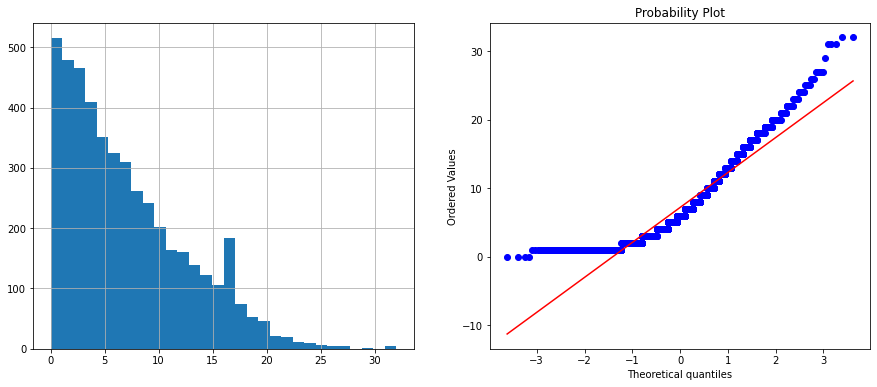

Graph of laps


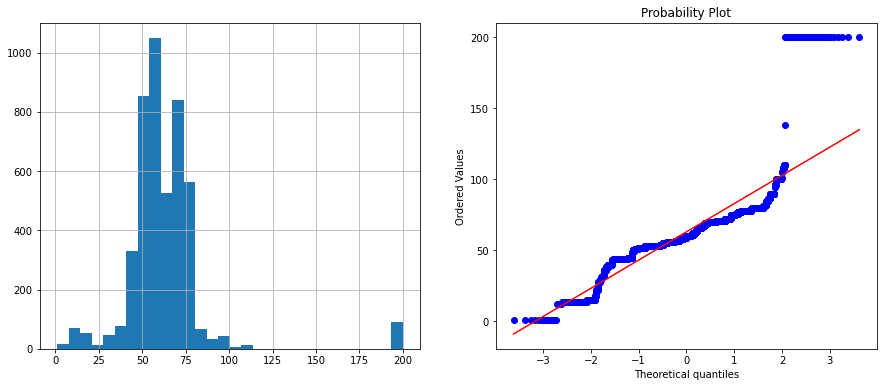

Graph of year


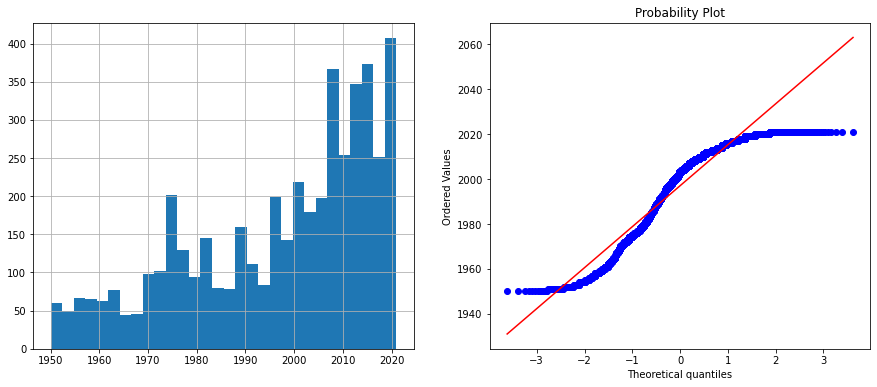

In [35]:
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    print(f'Graph of {variable}')
    plt.show()
diagnostic_plots(X_train_enc, 'grid')
diagnostic_plots(X_train_enc, 'laps')
diagnostic_plots(X_train_enc, 'year')

#diagnostic_plots(X_train_enc, 'position')

C:\Users\Min\anaconda3\lib\site-packages\scipy\stats\morestats.py:1375: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\Min\anaconda3\lib\site-packages\numpy\core\_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\Min\anaconda3\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Min\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


Graph of X train after Yeo Johnson Transformer
Graph of grid


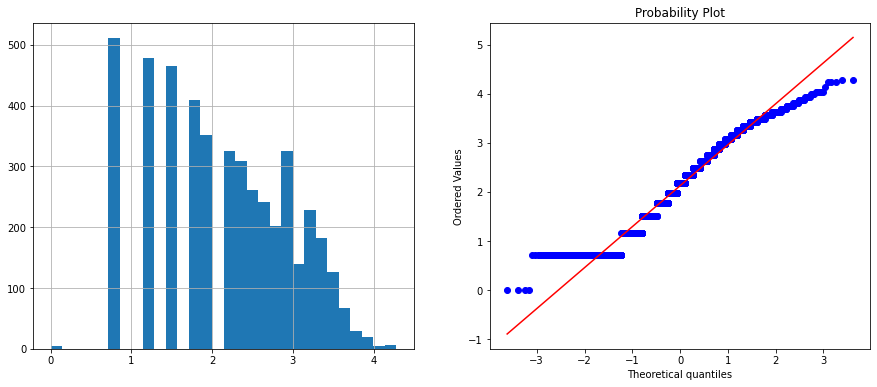

Graph of laps


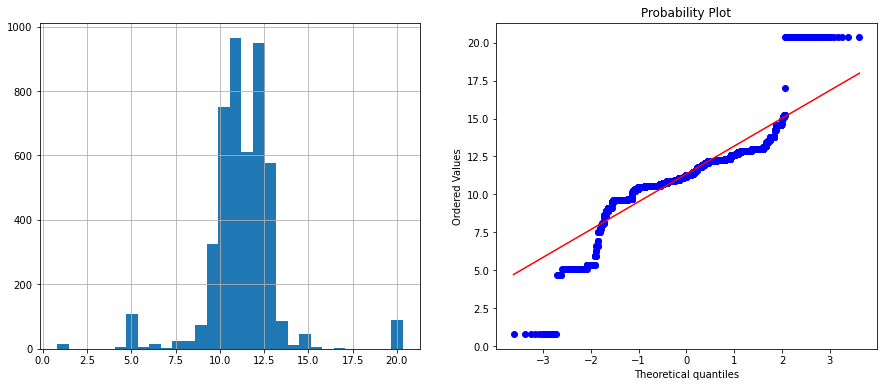

Graph of year


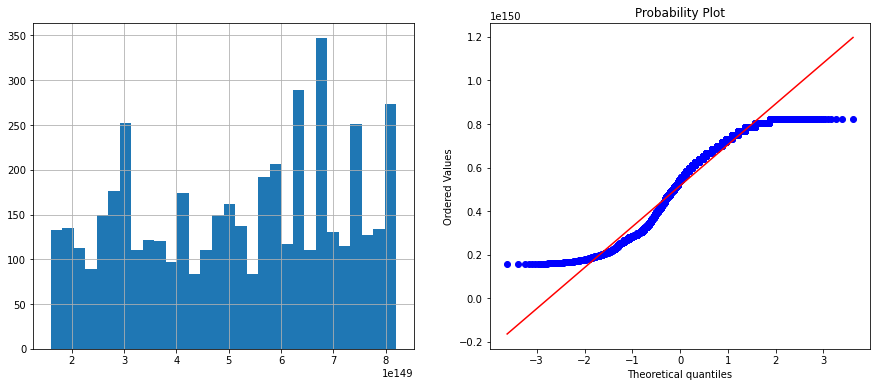

In [36]:
yjt = YeoJohnsonTransformer(variables = ['grid','laps','year'])
yjt.fit(X_train_enc)
data_tf = yjt.transform(X_train_enc)

print("Graph of X train after Yeo Johnson Transformer")
diagnostic_plots(data_tf, 'grid')
diagnostic_plots(data_tf, 'laps')
diagnostic_plots(data_tf, 'year')


Graph of X train after Power Transformer
Graph of grid


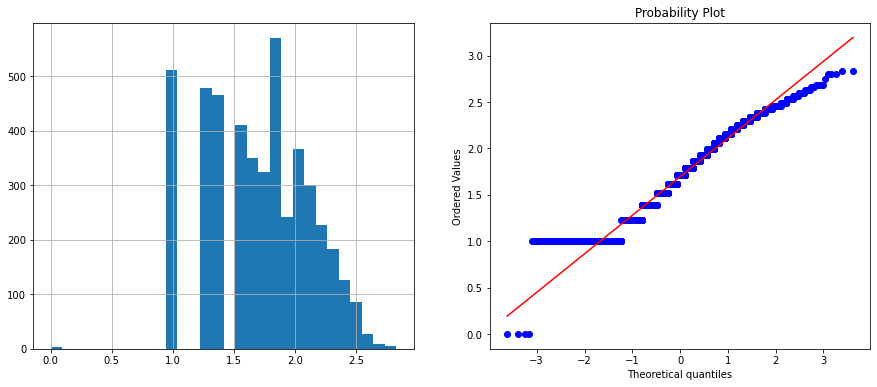

Graph of laps


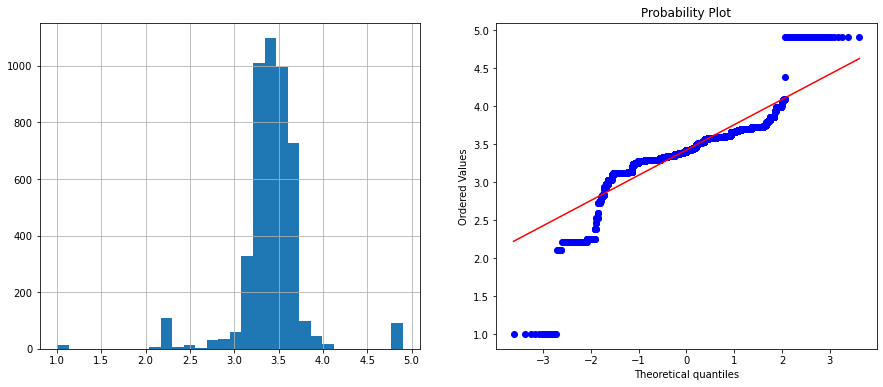

Graph of year


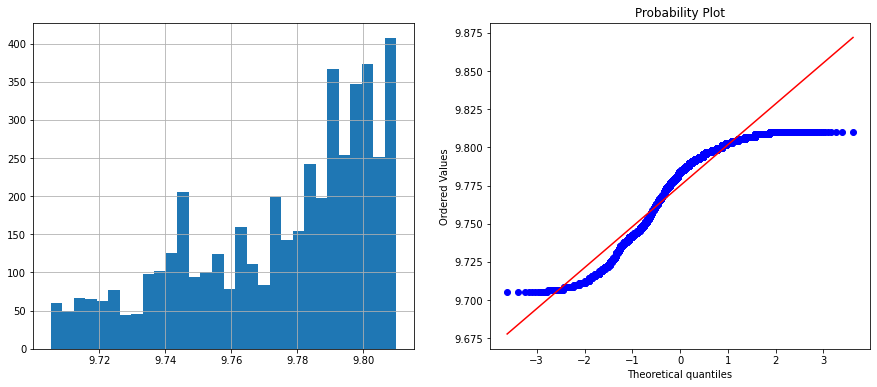

In [37]:
et = PowerTransformer(variables = ['grid', 'laps','year'], exp=0.3)

# fit transformer to data
et.fit(X_train_enc)

data_tf_power = et.transform(X_train_enc)

print("Graph of X train after Power Transformer")
diagnostic_plots(data_tf_power, 'grid')
diagnostic_plots(data_tf_power, 'laps')
diagnostic_plots(data_tf_power, 'year')


Graph of X test after Power Transformer
Graph of grid


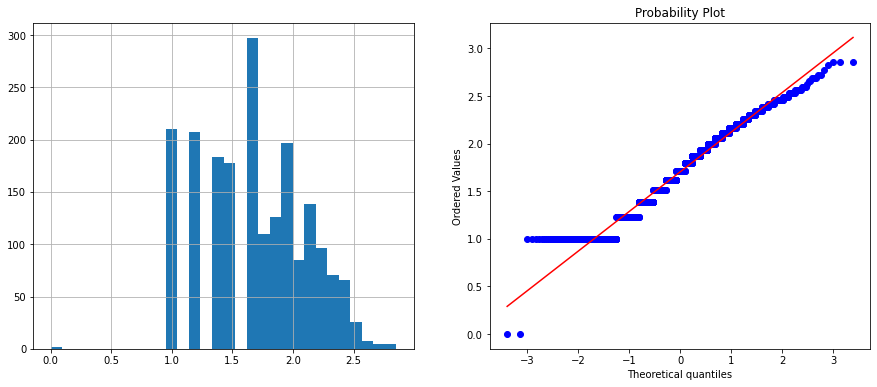

Graph of laps


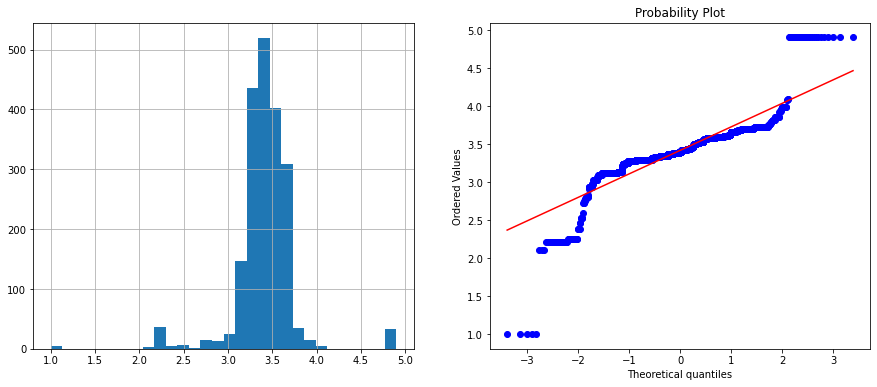

Graph of year


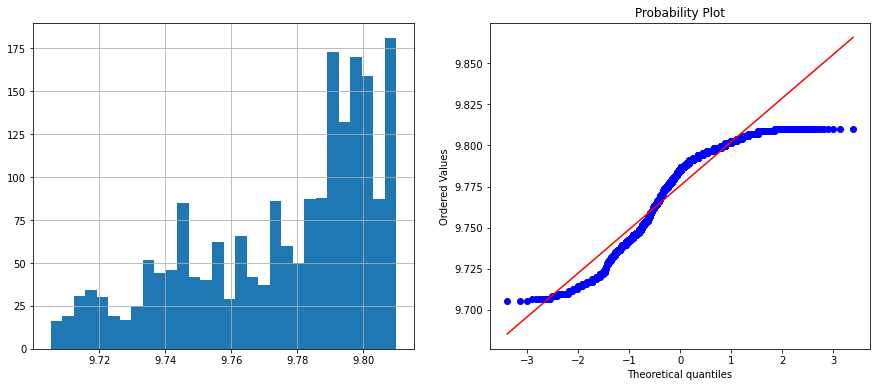

In [38]:
# repeat for x test
data_tf_test = et.transform(X_test_enc)

print("Graph of X test after Power Transformer")
diagnostic_plots(data_tf_test, 'grid')
diagnostic_plots(data_tf_test, 'laps')
diagnostic_plots(data_tf_test, 'year')


Decided to proceed with the results from the power transformation as it seemed to yield a slightly better r2 score and the variables looked slightly more continuous, especially for the graph of year. We will do the same transformation for both X train and X test. There was also an error , due to having unsuitable values when i attempted to use the Yeo Johnson transformer hence the power transformation would be sufficient in this case.

Next we will proceed with Standard Scaling so that the variables would be scaled to roughly the same range.

In [ ]:
#JC good understanding of iterative approach towards machine learning, we can try different transformations,
# but we pick the one which gives better results

### 4.4 Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(data_tf_power)

# transform train and test sets
X_train_scaled = scaler.transform(data_tf_power)
X_test_scaled = scaler.transform(data_tf_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=data_tf_power.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=data_tf_test.columns)

In [40]:
X_train_scaled.head() #view data

,year,grid,laps,constructorRef_mclaren,constructorRef_sauber,constructorRef_ferrari,constructorRef_benetton,constructorRef_dallara,constructorRef_renault,constructorRef_mercedes,...,name_Pescara Grand Prix,name_Qatar Grand Prix,name_Luxembourg Grand Prix,name_Styrian Grand Prix,name_Moroccan Grand Prix,name_São Paulo Grand Prix,name_Saudi Arabian Grand Prix,name_Mexico City Grand Prix,name_Pacific Grand Prix,name_Dallas Grand Prix
0,0.627914,1.435625,-0.108361,2.676846,-0.164165,-0.472357,-0.170895,-0.029226,-0.216579,-0.250623,...,-0.014608,-0.035802,-0.038675,-0.041349,-0.029226,-0.029226,-0.043862,-0.032679,-0.020661,-0.014608
1,0.836224,1.724651,0.730098,-0.373574,6.091444,-0.472357,-0.170895,-0.029226,-0.216579,-0.250623,...,-0.014608,-0.035802,-0.038675,-0.041349,-0.029226,-0.029226,-0.043862,-0.032679,-0.020661,-0.014608
2,0.680019,-0.721110,-0.349057,-0.373574,-0.164165,2.117043,-0.170895,-0.029226,-0.216579,-0.250623,...,-0.014608,-0.035802,-0.038675,-0.041349,-0.029226,-0.029226,-0.043862,-0.032679,-0.020661,-0.014608
3,0.940271,0.043088,-0.399086,-0.373574,-0.164165,2.117043,-0.170895,-0.029226,-0.216579,-0.250623,...,-0.014608,-0.035802,-0.038675,-0.041349,-0.029226,-0.029226,-0.043862,-0.032679,-0.020661,-0.014608
4,-0.418016,-1.099771,0.455872,-0.373574,-0.164165,2.117043,-0.170895,-0.029226,-0.216579,-0.250623,...,-0.014608,-0.035802,-0.038675,-0.041349,-0.029226,-0.029226,-0.043862,-0.032679,-0.020661,-0.014608


X TRAIN BEFORE AND AFTER SCALING


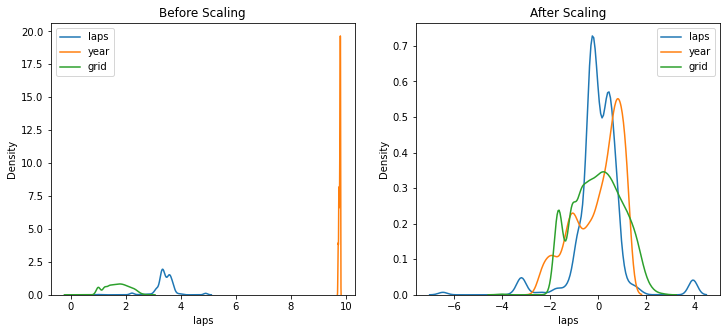

In [41]:
#XTRAIN
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(data_tf_power['laps'], ax=ax1, label ='laps')
sns.kdeplot(data_tf_power['year'], ax=ax1, label ='year')
sns.kdeplot(data_tf_power['grid'], ax=ax1, label ='grid')

ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['laps'], ax=ax2, label ='laps')
sns.kdeplot(X_train_scaled['year'], ax=ax2, label ='year')
sns.kdeplot(X_train_scaled['grid'], ax=ax2, label ='grid')

ax2.legend()
print("X TRAIN BEFORE AND AFTER SCALING")
plt.show()

X TEST BEFORE AND AFTER SCALING


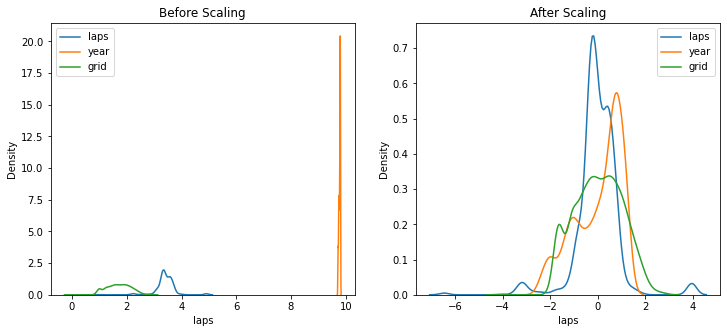

In [42]:
#REPEAT FOR X TEST
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(data_tf_test['laps'], ax=ax1, label ='laps')
sns.kdeplot(data_tf_test['year'], ax=ax1, label ='year')
sns.kdeplot(data_tf_test['grid'], ax=ax1, label ='grid')


ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_test_scaled['laps'], ax=ax2, label ='laps')
sns.kdeplot(X_test_scaled['year'], ax=ax2, label ='year')
sns.kdeplot(X_test_scaled['grid'], ax=ax2, label ='grid')

ax2.legend()
print("X TEST BEFORE AND AFTER SCALING")
plt.show()

As we can see, using the standard scaler successfully managed to convert it into a more normal distribution and scaled the variables so that they are approximately within the same range. I also tried this with the MinMax scaler but the standard scaler seemed to yield a slightly better score.Therefore we will stick with the results from the standard scaler.

### 5. Machine Learning Modelling

We will firstly visualize the X train scaled table so I can get an idea of how the data looks like and whether all columns appear to be properly scaled by the Standard scaler. We will then fit this into the LinearRegression model and evaluate the model based on MAE and r2 score before considering possible improvements.

In [43]:
X_train_scaled.head()

,year,grid,laps,constructorRef_mclaren,constructorRef_sauber,constructorRef_ferrari,constructorRef_benetton,constructorRef_dallara,constructorRef_renault,constructorRef_mercedes,...,name_Pescara Grand Prix,name_Qatar Grand Prix,name_Luxembourg Grand Prix,name_Styrian Grand Prix,name_Moroccan Grand Prix,name_São Paulo Grand Prix,name_Saudi Arabian Grand Prix,name_Mexico City Grand Prix,name_Pacific Grand Prix,name_Dallas Grand Prix
0,0.627914,1.435625,-0.108361,2.676846,-0.164165,-0.472357,-0.170895,-0.029226,-0.216579,-0.250623,...,-0.014608,-0.035802,-0.038675,-0.041349,-0.029226,-0.029226,-0.043862,-0.032679,-0.020661,-0.014608
1,0.836224,1.724651,0.730098,-0.373574,6.091444,-0.472357,-0.170895,-0.029226,-0.216579,-0.250623,...,-0.014608,-0.035802,-0.038675,-0.041349,-0.029226,-0.029226,-0.043862,-0.032679,-0.020661,-0.014608
2,0.680019,-0.721110,-0.349057,-0.373574,-0.164165,2.117043,-0.170895,-0.029226,-0.216579,-0.250623,...,-0.014608,-0.035802,-0.038675,-0.041349,-0.029226,-0.029226,-0.043862,-0.032679,-0.020661,-0.014608
3,0.940271,0.043088,-0.399086,-0.373574,-0.164165,2.117043,-0.170895,-0.029226,-0.216579,-0.250623,...,-0.014608,-0.035802,-0.038675,-0.041349,-0.029226,-0.029226,-0.043862,-0.032679,-0.020661,-0.014608
4,-0.418016,-1.099771,0.455872,-0.373574,-0.164165,2.117043,-0.170895,-0.029226,-0.216579,-0.250623,...,-0.014608,-0.035802,-0.038675,-0.041349,-0.029226,-0.029226,-0.043862,-0.032679,-0.020661,-0.014608


In [44]:
regressor_multi = LinearRegression()
model = regressor_multi.fit(X_train_scaled, y_train)

# Evaluate the Linear Regression Model using Mean Absolute Error (MAE)
# The lower MAE, the better model performance
print('train_mae:', mean_absolute_error(regressor_multi.predict(X_train_scaled), y_train))
print('r2 for X_train:',regressor_multi.score(X_train_scaled, y_train))

train_mae: 452136.96191612823
r2 for X_train: 0.7916645115548304


In [45]:
print(regressor_multi.coef_) # Check the coefficients

[-2.91942971e+05  8.06184884e+04  3.91395816e+05 -7.55439999e+18
 -3.68374915e+18 -8.89939499e+18 -3.82637040e+18 -6.72909640e+17
 -4.76724937e+18 -5.43405281e+18 -3.29713509e+18 -6.96730644e+18
 -2.32005072e+18 -3.56505887e+18 -3.59513916e+18 -1.30155259e+18
 -2.09329308e+18 -1.50209906e+18 -3.11030671e+18 -8.23966625e+17
 -2.69486072e+18 -5.72708720e+18 -8.23966625e+17 -2.71521752e+18
 -2.36738137e+18 -1.77578362e+18 -3.36562572e+17 -1.50209906e+18
 -1.00882547e+18 -2.59053849e+18 -1.21193884e+18 -3.82637040e+18
 -1.86789306e+18 -1.92679200e+18 -1.74397203e+18 -2.24710569e+18
 -1.83771611e+18 -5.26841707e+18 -2.67433993e+18 -1.00882547e+18
 -2.17161173e+18 -1.11506008e+18 -2.45729298e+18 -8.23966625e+17
 -1.06328175e+18 -1.16451773e+18 -1.30155259e+18 -1.81580117e+18
 -1.00882547e+18 -1.57507718e+18 -9.51231429e+17 -1.06328175e+18
 -7.41693527e+17 -1.25755383e+18 -1.86789306e+18 -2.52576301e+18
 -5.82819059e+17 -8.89890605e+17 -9.51231429e+17 -1.53902860e+18
 -6.72909640e+17 -1.16451

We will zip the names of the columns and the coefficients so we can visualize how much each variable impacts on the linear regression model.

In [46]:
names = X_train_scaled.columns
list(zip(names,regressor_multi.coef_))

[('year', -291942.9714714238),
 ('grid', 80618.48844735645),
 ('laps', 391395.81631196104),
 ('constructorRef_mclaren', -7.554399990008452e+18),
 ('constructorRef_sauber', -3.683749150809272e+18),
 ('constructorRef_ferrari', -8.899394986503539e+18),
 ('constructorRef_benetton', -3.8263704044711736e+18),
 ('constructorRef_dallara', -6.729096395692421e+17),
 ('constructorRef_renault', -4.767249366507525e+18),
 ('constructorRef_mercedes', -5.434052806124577e+18),
 ('constructorRef_tyrrell', -3.297135093426573e+18),
 ('constructorRef_williams', -6.967306443988435e+18),
 ('constructorRef_lotus_f1', -2.32005072392255e+18),
 ('constructorRef_toro_rosso', -3.565058873401707e+18),
 ('constructorRef_team_lotus', -3.595139163486577e+18),
 ('constructorRef_mclaren-ford', -1.3015525930139924e+18),
 ('constructorRef_march', -2.0932930828721224e+18),
 ('constructorRef_prost', -1.5020990568304369e+18),
 ('constructorRef_brabham', -3.110306710086354e+18),
 ('constructorRef_caterham', -8.23966625137524e

In [47]:
regressor_multi = LinearRegression()
model = regressor_multi.fit(X_test_scaled, y_test)

# Evaluate the Linear Regression Model using Mean Absolute Error (MAE)
# The lower MAE, the better model performance
print('test_mae:', mean_absolute_error(regressor_multi.predict(X_test_scaled), y_test))
print('r2 for X_test:',regressor_multi.score(X_test_scaled, y_test))

test_mae: 392273.89049278246
r2 for X_test: 0.8113414696080979


### 6. Possible Further Improvements and Conclusion

The MAE score is relatively high, but we do have a decent r2 score for both X train and X test. 
The high MAE score may be due to that the target variable milliseconds is in the millions range. This may also be a factor in why there is a good r2 score.

In my initial drafts, I had wanted to use position (final ranking in the competition) as a target variable, but it yielded a worse r2 score that the milliseconds column ( time taken to finish the race). It appears that a continuous variable would be easier for the model to predict rather than an ordinal variable. The amount of time taken to finish the race can act as a proxy to predict which driver would be the winner, based on the other data available.

Even with all the data above, formula races are difficult to predict due to various conditions sometimes not captured in the dataset. For example, injuries to the driver, drivers sometimes changing teams, weather conditions, tyre conditions, penalties etc.

One of the limitations of this model would be that it uses information on existing and older drivers. Hence if there are many new drivers in the next round of Formula One, it may not be so accurate to predict.

Another limitation is the "name", as it only mentions the country. More countries could be involved in the future with unknown race lap/timings and conditions. There could also be multiple types of race tracks within each country, which would further affect results. Furthermore, with covid-19, there might be different rules and regulations for each country which possibly would affect whether each participant is able to carry on the competition as usual.

Usually I will try to remove statistically insignificant columns by checking the coefficients. However as illustrated in the X train coefficients above, all the columns ( which are not one hot encoded) seem to have a relatively high coefficient score, hence I will not remove them. The One Hot encoded columns have a lot of coefficients as there are several categorical variables and they all seem to be relatively similar to each other therefore I will not remove any of the categorical columns. Having several columns and coefficients complicates the model but I believe that the categories in place would have significant contribution to the accuracy of the model.

I also tried to limit the number of years to the last 20 years, but it had a negative impact on the r2 score, therefore I decided to keep most of my data. With this data, I can attempt to predict the overall result times of a F1 race and therefore the results of the drivers participating.